* threshold, color histogram by opencv

In [1]:
import glob
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import cv2

In [11]:
img_paths = np.array(glob.glob('./data/flower_images/*.png'))
img_paths = np.random.choice(img_paths, size=10)

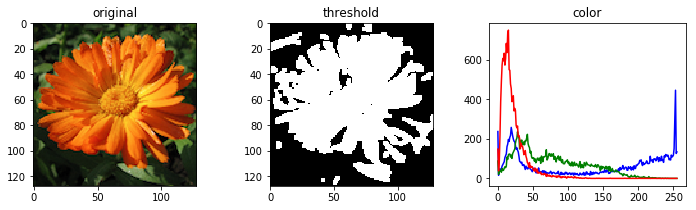

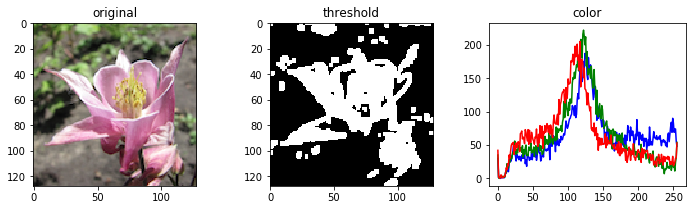

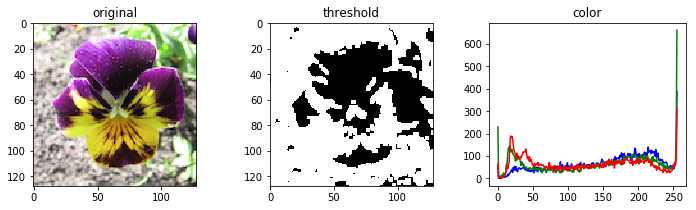

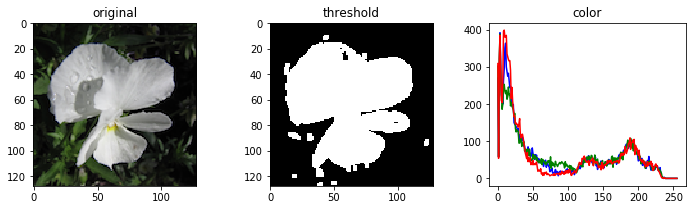

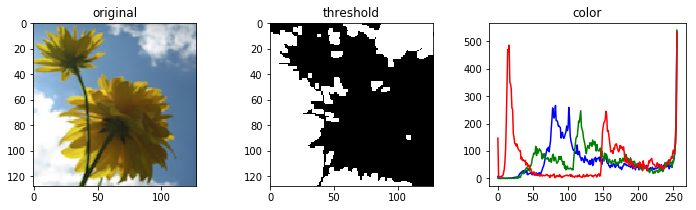

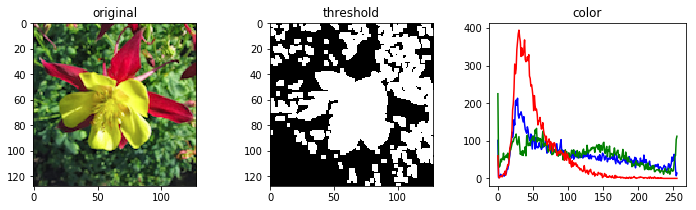

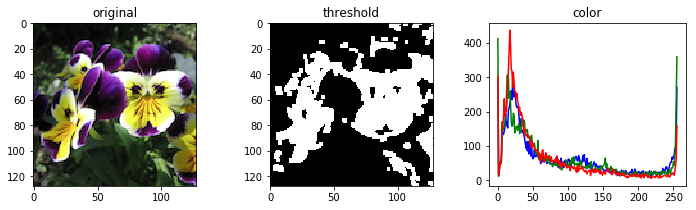

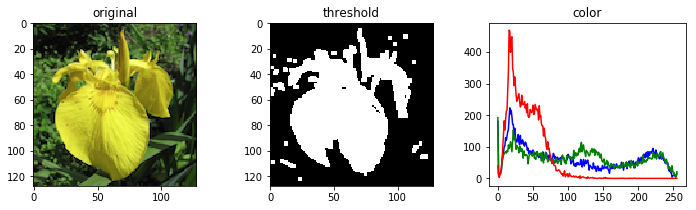

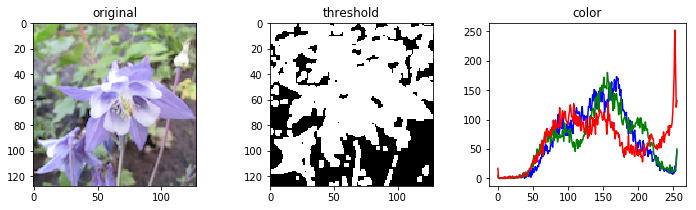

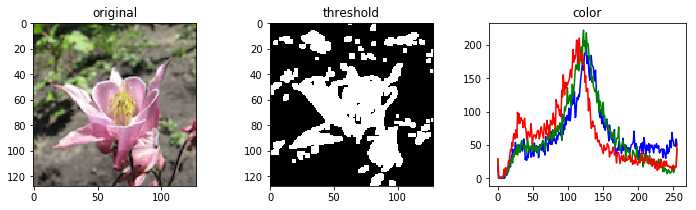

In [12]:
s = 3
neiborhood = np.ones(s**2).reshape(s, s).astype('uint8')

for path in img_paths:
    
    fig, axs = plt.subplots(ncols=3, figsize=(12,3))
    
    org_img = cv2.imread(path)
    org_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
    axs[0].imshow(org_img, cmap='gray', vmin=0, vmax=255, interpolation='none')
    axs[0].set_title('original')

    # 領域
    img = cv2.cvtColor(org_img, cv2.COLOR_RGB2GRAY) # グレースケール
    img = cv2.dilate(img, neiborhood, iterations=1) # 白を膨張
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) # 閾値処理
    img = 255 - img
    axs[1].imshow(img, cmap='gray', vmin=0, vmax=255, interpolation='none')
    axs[1].set_title('threshold')
    
    # 色ヒストグラム
    color = ('b','g','r')
    for i,col in enumerate(color):
        h = cv2.calcHist([org_img], channels=[i], mask=None, histSize=[256], ranges=[0,256])
        axs[2].plot(h, color=col)
    axs[2].set_title('color')
    
    plt.show()

In [13]:
!python --version

Python 3.6.3


In [14]:
!pip freeze

absl-py==0.2.0
astor==0.6.2
backcall==0.1.0
bleach==1.5.0
certifi==2018.4.16
chainer==4.0.0
chardet==3.0.4
cntk-gpu==2.5.1
cupy==4.0.0
cycler==0.10.0
Cython==0.28.2
decorator==4.3.0
dm-sonnet==1.20
entrypoints==0.2.3
fastrlock==0.3
filelock==3.0.4
future==0.16.0
gast==0.2.0
graphviz==0.8.3
grpcio==1.11.0
h5py==2.7.1
html5lib==0.9999999
idna==2.6
ipykernel==4.8.2
ipython==6.3.1
ipython-genutils==0.2.0
ipywidgets==7.2.1
jedi==0.12.0
Jinja2==2.10
jsonschema==2.6.0
jupyter==1.0.0
jupyter-client==5.2.3
jupyter-console==5.2.0
jupyter-core==4.4.0
kaggle==1.4.5
Keras==2.1.6
kiwisolver==1.0.1
Lasagne==0.2.dev1
leveldb==0.194
Mako==1.0.7
Markdown==2.6.11
MarkupSafe==1.0
matplotlib==2.2.2
mistune==0.8.3
mxnet-cu90==1.1.0.post0
nbconvert==5.3.1
nbformat==4.4.0
networkx==2.1
nose==1.3.7
notebook==5.4.1
numpy==1.14.3
pandas==0.22.0
pandocfilters==1.4.2
parso==0.2.0
pexpect==4.5.0
pickleshare==0.7.4
Pillow==5.1.0
prompt-toolkit==1.0.15
protobuf==3.5.2.post1
ptyprocess==0.5.2
pycurl==7.43.0
Pygments==